In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.columns
#note that 0 is no diabetes, 1 is yes prediabetes or diabetes

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
#import sk learn train test split, split into train and test data
#import sk learn regression, see if we can run a predict on the variables
#try logistic regression b/c 1 and 0 and compare to linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [6]:
#splitting data 70 train 30 test first
#y is predicted variable, X are the feature variables (the rest of the columns)
y = df['Diabetes_binary']
X = df.drop(columns = ['Diabetes_binary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [7]:
#calling logistic regression model as log_model
#fitting the model with the training data
#note had to increase the max iterations (i think because of the large data size)

log_model = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [8]:
#predicting the specific probability for the first 10 people to have diabetes based on the model
people10 = log_model.predict_proba(X_test[:10])
people10

log_model_y_pred = log_model.predict(X_test)  #this is just predicting each y value of X_test, 0 or 1

In [9]:
#scoring the log_model
log_model_score = log_model.score(X_test, y_test)
print(log_model_score)

#score of .8652 with .3 test size

0.8658152002522863


In [10]:
#importing a few other metrics to check them out because the dataset is not balanced. 
#i think recall would be an interesting metric, i want to know how many of the people with diabetes the model is able to identify
#recall is #true positives/#all actual positives so it will tell what percentage of diabetics the model is able to identify
print('the number of people with diabetes is: ' + str(len(df.loc[df['Diabetes_binary']==1.0])))
print('the number of people without diabetes is: ' + str(len(df.loc[df['Diabetes_binary']==0.0])))
print('the number of people in the survey is: ' + str(len(df['Diabetes_binary']==0.0)))

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

the number of people with diabetes is: 35346
the number of people without diabetes is: 218334
the number of people in the survey is: 253680


In [11]:
#rerunning different split sizes to see if we can improve the score
#it seems like a training size of .85 and .15 test is best slightly, can go with the 80-20 rule with not much performance loss (about .06%) for simplicity
y = df['Diabetes_binary']
X = df.drop(columns = ['Diabetes_binary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

log_model = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

log_model_score = log_model.score(X_test, y_test)
log_model_recall = recall_score(y_test, log_model_y_pred)
log_model_precision = precision_score(y_test, log_model_y_pred)
log_model_f1 = f1_score(y_test, log_model_y_pred)
print('the accuracy score of the log model is ' + str(log_model_score))
print('the recall score of the log model is ' + str(log_model_recall))
print('the precision score of the log model is ' + str(log_model_precision))
print('the f1 score of the log model is ' + str(log_model_f1))
#score of .8658 with .2 test size

the accuracy score of the log model is 0.8658152002522863
the recall score of the log model is 0.16507074460483065
the precision score of the log model is 0.5445544554455446
the f1 score of the log model is 0.25334503180522044


In [12]:
#high accuracy may be a misleading stat in this case because there are more negatives than positives in this unbalanced dataset

#low recall makes it seem like my model is missing many cases where the person has diabetes, its only able to find 16.5% of positives

#approx .54 precision seems like the model is almost flipping a coin when it flags a case as positive

Accuracy = correct predictions / sum of all observations

recall = true positives / all actual positives

precision = true positives / all predicted positives

f1 score = a blend of precision and recall

In [13]:
#ill try a linear regression as well and compare the metrics =

In [14]:
y = df['Diabetes_binary']
X = df.drop(columns = ['Diabetes_binary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

lin_model = LinearRegression().fit(X_train, y_train)

lin_model_y_pred = lin_model.predict(X_test)

lin_model_score = lin_model.score(X_test, y_test)
#lin_model_recall = recall_score(y_test, lin_model_y_pred)
#lin_model_precision = precision_score(y_test, lin_model_y_pred)
#lin_model_f1 = f1_score(y_test, lin_model_y_pred)
print('the accuracy score of the lin model is ' + str(lin_model_score))
#print('the recall score of the lin model is ' + str(lin_model_recall))
#print('the precision score of the lin model is ' + str(lin_model_precision))
#print('the f1 score of the lin model is ' + str(lin_model_f1))

the accuracy score of the lin model is 0.16269021365974368


In [15]:
#trying a boosting model
!pip install xgboost

In [16]:
import xgboost as xgb

In [20]:
# XGBoost (different learning rate)
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr, eval_metric='error')
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

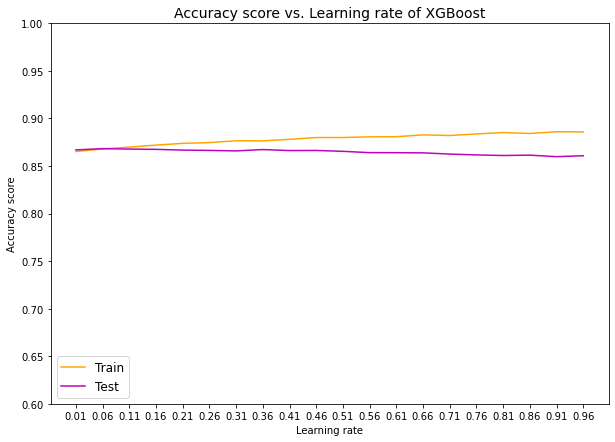

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

In [29]:
xgb_classifier_predictions = xgb_classifier.predict(X_test)

xgb_classifier_predictions = [round(value) for value in xgb_classifier_predictions]

xgb_recall = recall_score(y_test, xgb_classifier_predictions)
print('the recall score of the xgboost model is: ' + str(xgb_recall))
xgb_precision = precision_score(y_test, xgb_classifier_predictions)
print('the precision score of the xgboost model is: ' + str(xgb_precision))
xgb_f1 = f1_score(y_test, xgb_classifier_predictions)
print('the f1 score of the xgboost model is: ' + str(xgb_f1))

the recall score of the xgboost model is: 0.19708446477061597
the precision score of the xgboost model is: 0.488141592920354
the f1 score of the xgboost model is: 0.28079820810425576


# new learning rate range, keeps crashing my pc so not going to run it for now
learning_rate_range = np.arange(0.01, 0.5, 0.05)
fig = plt.figure(figsize=(19, 17))
idx = 1
# grid search for min_child_weight
for weight in np.arange(0, 4.5, 0.5):
    train = []
    test = []
    for lr in learning_rate_range:
        xgb_classifier = xgb.XGBClassifier(eta = lr, reg_lambda=1, min_child_weight=weight)
        xgb_classifier.fit(X_train, y_train)
        train.append(xgb_classifier.score(X_train, y_train))
        test.append(xgb_classifier.score(X_test, y_test))
    fig.add_subplot(3, 3, idx)
    idx += 1
    plt.plot(learning_rate_range, train, c='orange', label='Training')
    plt.plot(learning_rate_range, test, c='m', label='Testing')
    plt.xlabel('Learning rate')
    plt.xticks(learning_rate_range)
    plt.ylabel('Accuracy score')
    plt.ylim(0.6, 1)
    plt.legend(prop={'size': 12}, loc=3)
    title = "Min child weight:" + str(weight)
    plt.title(title, size=16)
plt.show()

In [19]:
#out of the box, the boost model performed a bit better than the logreg... but not by much

In [37]:
#now trying random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)

rfc.fit(X_train, y_train)

rfc_predictions = rfc.predict(X_test)
rfc_predictions = [round(value) for value in rfc_predictions]

In [42]:
rfc_recall = recall_score(y_test, rfc_predictions, average='weighted', labels=np.unique(rfc_predictions))
print('the recall score of the random forest model is: ' + str(rfc_recall))
rfc_precision = precision_score(y_test, rfc_predictions, average='weighted', labels=np.unique(rfc_predictions))
print('the precision score of the random forest model is: ' + str(rfc_precision))
rfc_f1 = f1_score(y_test, rfc_predictions, average='weighted', labels=np.unique(rfc_predictions))
print('the f1 score of the random forest model is: ' + str(rfc_f1))

the recall score of the random forest model is: 1.0
the precision score of the random forest model is: 0.8620900346893724
the f1 score of the random forest model is: 0.9259380788568403


since the precision is .86, the model predicted more people to not have diabetes than there are really people without it.  EX: some people were labelled diabetes-free
but they actually have diabetes.  

The recall is perfect because there were no false negatives (this is because it looks like the random forest is only predicting "no diabetes")



In [34]:
print(rfc.score(X_test, y_test))

0.8620900346893724


In [ ]:
rfc_predictions

In [45]:
print(len(np.unique(rfc_predictions)))
print(len(np.unique(y_test)))

1
2


In [46]:
print(np.unique(rfc_predictions))

[0]


In [52]:
from scipy.stats.stats import pearsonr

In [55]:
#check correlation of each feature variable with target variable
#p value less than .05 indicates a statistically significant correlation
#correlation coefficient 1 is perfectly correlated, -1 is perfectly non correlated, 0 is not correlated

for i in range(0,21):
    correlation_Xy = np.corrcoef(X_train.iloc[:,i], y_train)[0,1]
    p_value = pearsonr(X_train.iloc[:,i], y_train)
    print('correlation coef: ' + str(correlation_Xy) + ' ' +
         'p value: ' + str(p_value))

correlation coef: 0.26228223387373634 p value: (0.2622822338738764, 0.0)
correlation coef: 0.1973449850367364 p value: (0.19734498503677317, 0.0)
correlation coef: 0.06477696370930751 p value: (0.06477696370936722, 1.362363569765314e-187)
correlation coef: 0.21741072589838062 p value: (0.21741072589843904, 0.0)
correlation coef: 0.062158040888684145 p value: (0.06215804088867371, 7.264447583709721e-173)
correlation coef: 0.10731356587237616 p value: (0.1073135658724619, 0.0)
correlation coef: 0.17896191645847703 p value: (0.17896191645853915, 0.0)
correlation coef: -0.1181766065759915 p value: (-0.11817660657603714, 0.0)
correlation coef: -0.03960199163971241 p value: (-0.03960199163972564, 3.0327934423733287e-71)
correlation coef: -0.05686140691366042 p value: (-0.056861406913700854, 6.018195306069656e-145)
correlation coef: -0.05583923644932997 p value: (-0.055839236449317334, 7.588018511039924e-140)
correlation coef: 0.015831070818247084 p value: (0.015831070818253194, 9.87839753734

In [ ]:
#check to see if each correlation is statistically significant, if p-value < .05 it is significant correlation